### Mutiple Linear Regression (MLA)

Loading the Housing dataset into a data frame

Attributes:
1. CRIM      per capita crime rate by town
2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
3. INDUS     proportion of non-retail business acres per town
4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
5. NOX       nitric oxides concentration (parts per 10 million)
6. RM        average number of rooms per dwelling
7. AGE       proportion of owner-occupied units built prior to 1940
8. DIS       weighted distances to five Boston employment centres
9. RAD       index of accessibility to radial highways
10. TAX      full-value property-tax rate per $10,000
11. PTRATIO  pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
13. LSTAT    % lower status of the population
14. MEDV     Median value of owner-occupied homes in $1000s


In [1]:
import pandas as pd
import warnings

df = pd.read_csv("housing.data.txt", header=None, sep="\s+")

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
C:\Users\xande\AppData\Local\Temp\ipykernel_20524\1932071709.py:4: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv("housing.data.txt", header=None, sep="\s+")


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


#### Exploratory Data Analysis (EDA)
Visualizing the important characteristics of the dataset

c:\Users\xande\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


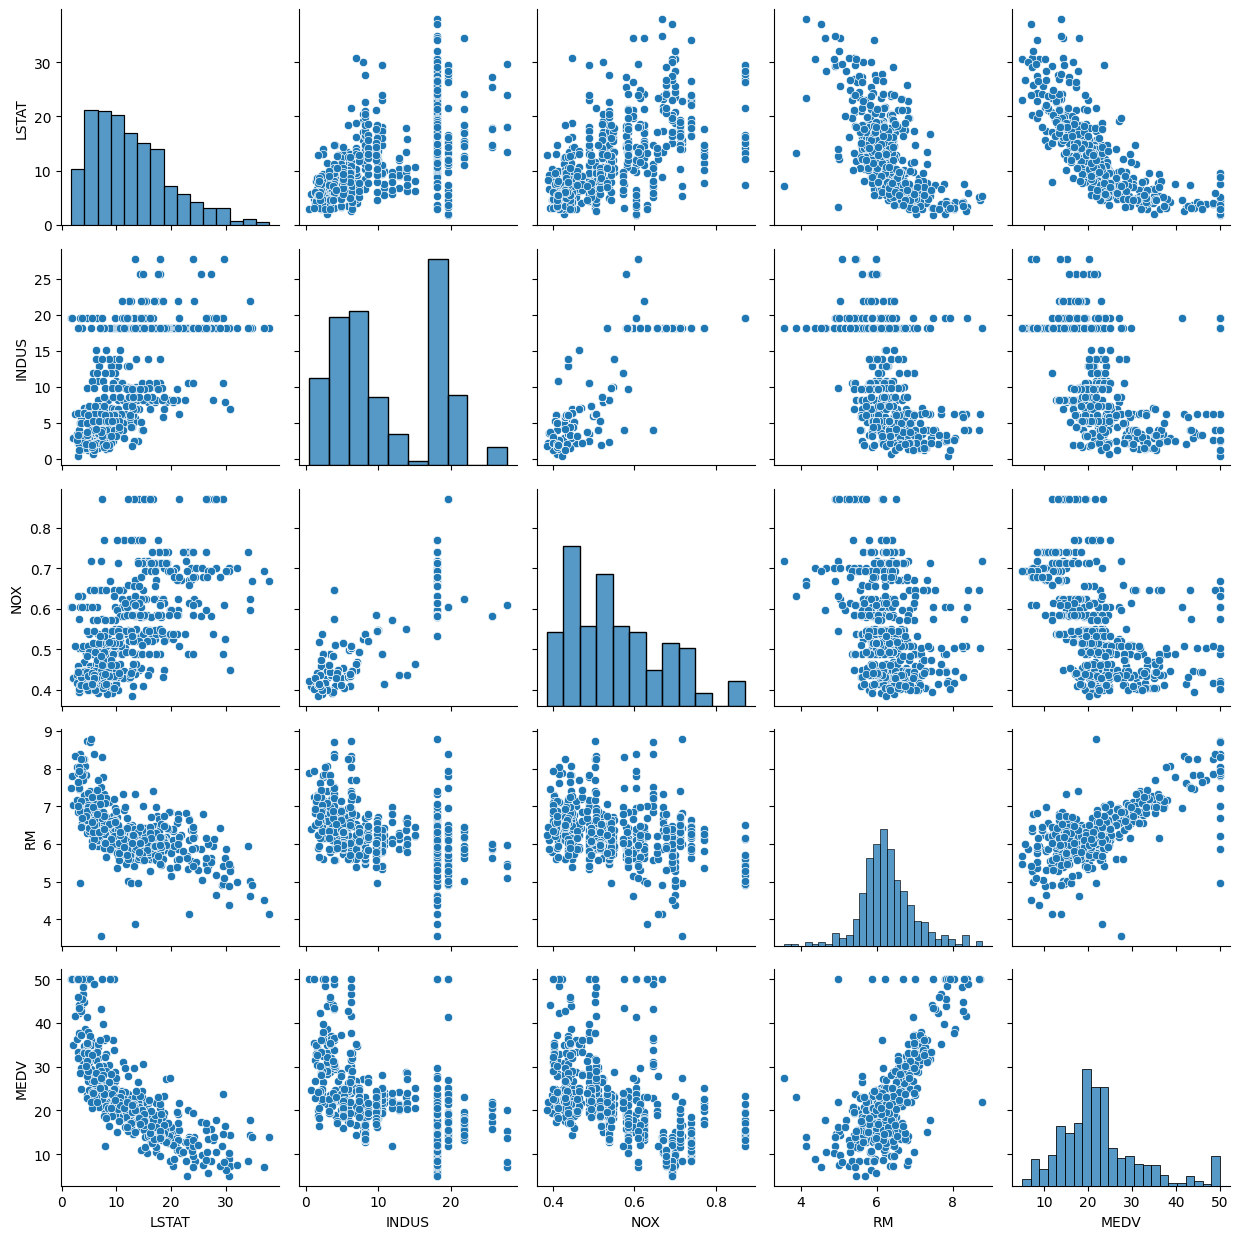

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']

sns.pairplot(df[cols], size=2.5)
plt.tight_layout()
# plt.savefig('images/10_03.png', dpi=300)
plt.show()


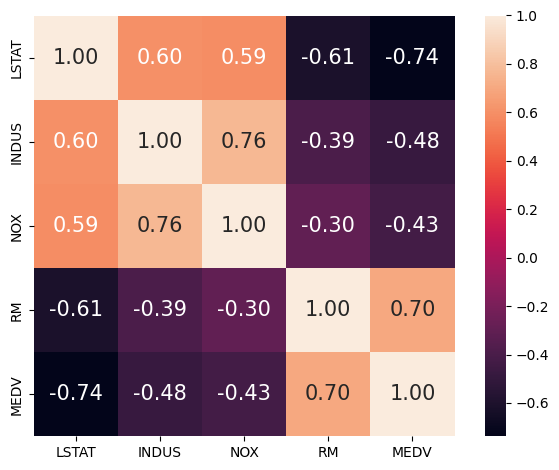

In [3]:
import numpy as np


cm = np.corrcoef(df[cols].values.T)
#sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=cols,
                 xticklabels=cols)

plt.tight_layout()
# plt.savefig('images/10_04.png', dpi=300)
plt.show()

#### Implementing a simple linear regression model (SLR)

Solving regression for regression parameters with gradient descent

In [4]:
# Defining the model:

class LinearRegressionGD(object):

    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return self.net_input(X)

In [5]:
# Separating target and attribute
X = df[['RM']].values 
y = df['MEDV'].values

# Splitting train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.3, random_state=0)

# It's importand to standardize/normalize dataset before applying ML models 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# Fitting the model to dataset
lr = LinearRegressionGD()
lr.fit(X_train_std, y_train)

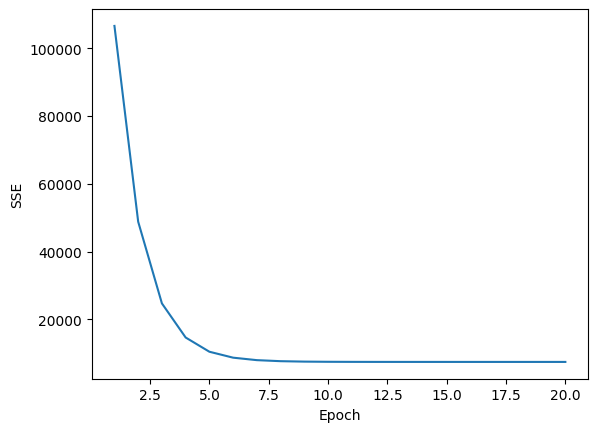

In [6]:
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
#plt.tight_layout()
#plt.savefig('images/10_05.png', dpi=300)
plt.show()

In [7]:
# Let's visualize model fitting 

def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)    
    return 

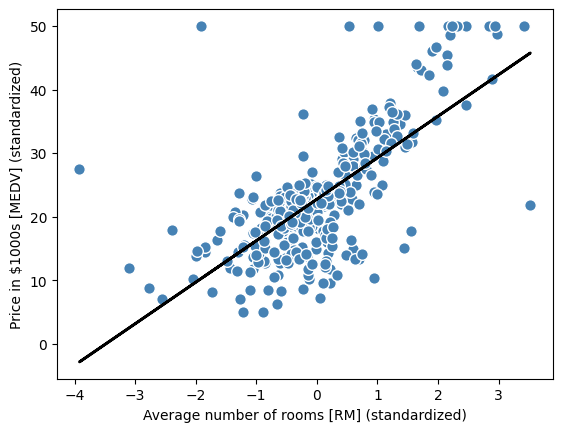

In [8]:
lin_regplot(X_train_std, y_train, lr)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000s [MEDV] (standardized)')

#plt.savefig('images/10_06.png', dpi=300)
plt.show()

In [9]:
# Print the estimated parameters
print('Slope: %.3f' % lr.w_[1])
print('Intercept: %.3f' % lr.w_[0])

Slope: 6.526
Intercept: 22.742


In [10]:
# Prediction on the test set
y_pred_test = lr.predict(X_test_std)

y_pred_test

array([ 2.29706113e+01,  2.18813604e+01,  2.33430047e+01,  1.38097322e+01,
        2.20303178e+01,  1.83250029e+01,  1.89860013e+01,  1.95725210e+01,
        1.03092337e+01,  2.36409195e+01,  1.94701128e+01,  2.59869983e+01,
        2.30450900e+01,  7.32077623e+00,  3.66467610e+01,  2.95619755e+01,
        2.21234162e+01,  3.18521952e+01,  2.49536064e+01,  1.84739603e+01,
        2.38364261e+01,  1.87532554e+01,  2.10527850e+01,  2.43577769e+01,
        1.69099078e+01, -2.46847148e-02,  1.95445915e+01,  1.71612733e+01,
        3.91324873e+01,  2.07269407e+01,  2.15927555e+01,  2.06245325e+01,
        2.19744588e+01,  2.07548702e+01,  2.37433277e+01,  1.80363980e+01,
        1.97494079e+01,  1.87067062e+01,  2.31102588e+01,  2.13786292e+01,
        2.10527850e+01,  1.78781307e+01,  2.12110522e+01,  1.45358995e+01,
        2.48977474e+01,  2.37898769e+01,  1.79153701e+01,  2.10714046e+01,
        9.65754517e+00,  2.66386868e+01,  2.12855309e+01,  1.67981897e+01,
        1.96935488e+01,  

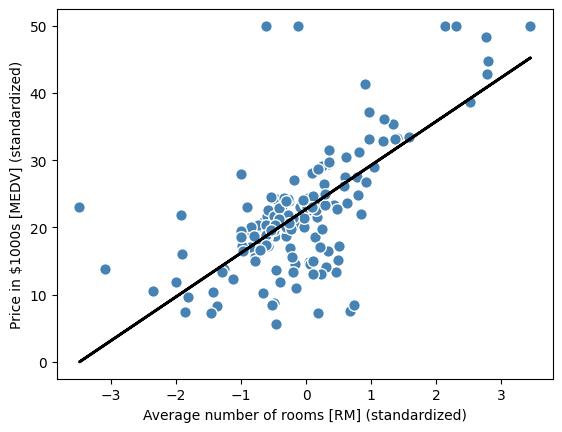

In [11]:
# Visualize prediction
lin_regplot(X_test_std, y_test, lr)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000s [MEDV] (standardized)')

#plt.savefig('images/10_06.png', dpi=300)
plt.show()

In [12]:
# Evaluation 
from sklearn.metrics import r2_score, mean_squared_error
print ('R2 = ', r2_score(y_test, y_pred_test))
print ('RMSE = ', mean_squared_error(y_test, y_pred_test, squared=False))

R2 =  0.4351532234586025
RMSE =  6.858006284710742


c:\Users\xande\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Using scikit learn linear regression function

In [13]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X_train_std, y_train)
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Slope: 6.527
Intercept: 22.745


In [14]:
# Prediction:
y_pred_test = lr.predict(X_test)
print ('R2 = ', r2_score(y_test, y_pred_test))
print ('RMSE = ', mean_squared_error(y_test, y_pred_test, squared=False))

R2 =  -20.130705528838607
RMSE =  41.9459032083702


c:\Users\xande\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Multiple Linear Regression 

Now we use all attributes to predict the MEDV

In [15]:
X = df.iloc[:, :-1].values
y = df['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.3, random_state=0)
# Standardize data
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

Mlr = LinearRegression()
Mlr.fit(X_train_std, y_train)
# Prediction:
y_test_pred = Mlr.predict(X_test_std)

In [16]:
# Evaluation 

print ('R2 = ', r2_score(y_test, y_test_pred))
print ('RMSE = ', mean_squared_error(y_test, y_test_pred, squared=False))

R2 =  0.6733825506400195
RMSE =  5.214975145375403


c:\Users\xande\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
